### Problem 1.2

Text(0.5, 1.0, '$f(x) = x + sin(1.5 x)$ and some observations, $y$')

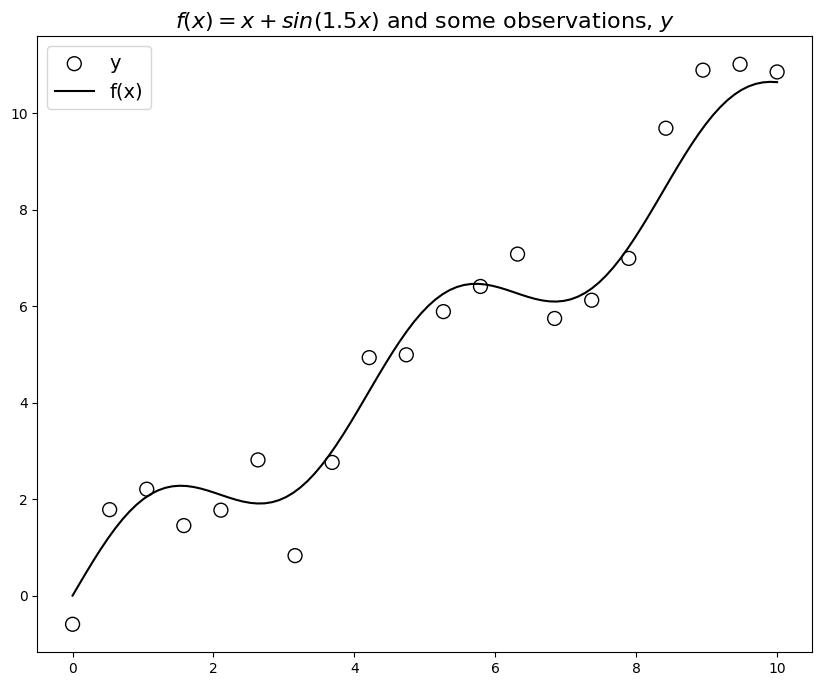

In [185]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)
MARKER_SIZE = 100
DATA_COLOR = 'black'
ERROR_COLOR = 'darkred'
POLYNOMIAL_FIT_COLORS = ['orange', 'royalblue', 'darkgreen']
LEGEND_FONTSIZE = 14
TITLE_FONTISIZE = 16
N_OBSERVATIONS = 20


mu = 0
sigma = np.sqrt(0.3)

x = np.linspace(0, 10, 20)
x_grid = np.linspace(0, 10, 100)
x = np.sort(x)





def f(x):
    """Base function"""
    return x + np.sin(1.5 * x)


def sample_fx_data(shape):
    return f(x) + np.random.normal(mu, sigma, shape)



def plot_fx_data(y=None):
    """Plot f(x) and noisy samples"""
    y = y if y is not None else sample_fx_data(x.shape)
    fig, axs = plt.subplots(figsize=(10, 8))
    plt.scatter(x, y, s=MARKER_SIZE, edgecolor=DATA_COLOR, facecolors='none', label='y')
    plt.plot(x_grid, f(x_grid), color=DATA_COLOR, label='f(x)')


# Plot the data
y = sample_fx_data(x.shape)
plot_fx_data(y)
plt.legend(fontsize=14)
plt.title(f'$f(x) = x + sin(1.5 x)$ and some observations, $y$', fontsize=16)


In [186]:
# print dataset

print(f'x = {x}')
print(f'y = {y}')


x = [ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]
y = [-0.59462437  1.78256712  2.20759207  1.45232444  1.77204939  2.81473987
  0.82904674  2.76263642  4.93650655  4.99467064  5.89048626  6.41230628
  7.08377046  5.74860342  6.12686944  6.99424747  9.69445243 10.8994827
 11.02093759 10.86181084]


### Problem 1.3

Text(0.5, 1.0, 'Various Polynomial Functions Fit to Observations')

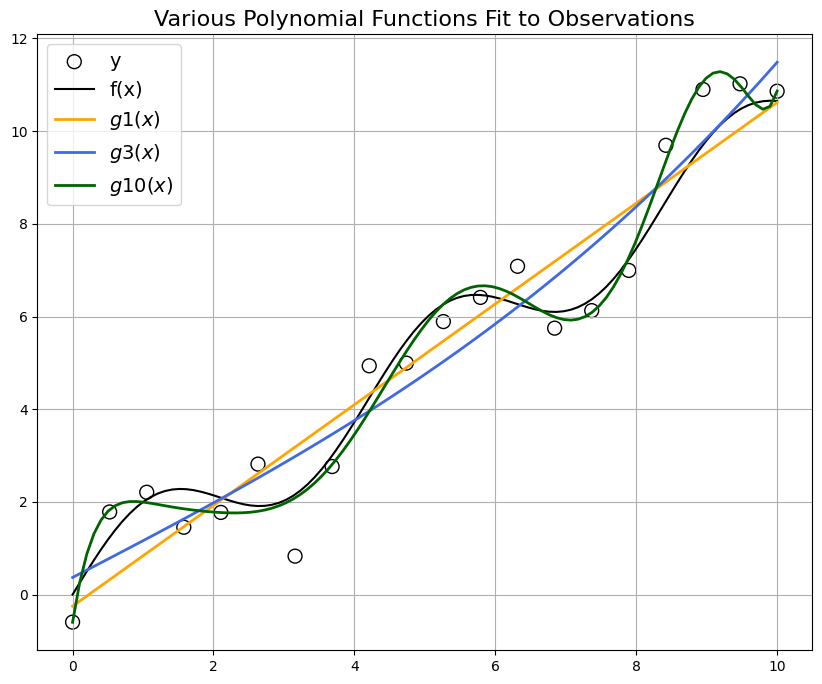

In [183]:
np.random.seed(123)
plot_fx_data(y)


x_grid = np.linspace(0, 10, 100)
polynomial_degrees = [1, 3, 10]
theta = {}
fit = {}
for ii, degree in enumerate(polynomial_degrees):
    # Note: we should get an overconditioned warning for degree 10 because of extreme overfitting
    theta[degree] = np.polyfit(x, y, degree)
    fit[degree] = np.polyval(theta[degree], x_grid)
    plt.plot(x_grid, fit[degree], POLYNOMIAL_FIT_COLORS[ii], label=f"$g{degree}(x)$", linewidth=2)
plt.legend(fontsize=LEGEND_FONTSIZE)

plt.grid(True)
# plt.xlim([-1, 1])
# plt.ylim([-2, 2])
plt.title("Various Polynomial Functions Fit to Observations", fontsize=TITLE_FONTISIZE)

### Problem 1.4

In [171]:
from collections import defaultdict

def error_function(pred, actual):
    return (pred - actual) ** 2

[ 0.34693878 -0.10204082  0.71428571 -0.2244898  -0.30612245  0.55102041
  0.3877551   0.14285714 -0.91836735  0.83673469]
[ 0.6595074  -0.27139635  1.37797612 -0.81345131 -0.70579695  1.61289501
  1.62182572  0.53467041 -2.16732898  1.90568239]


Text(0.5, 1.0, 'Testing Error Relationship to Bias and Variance')

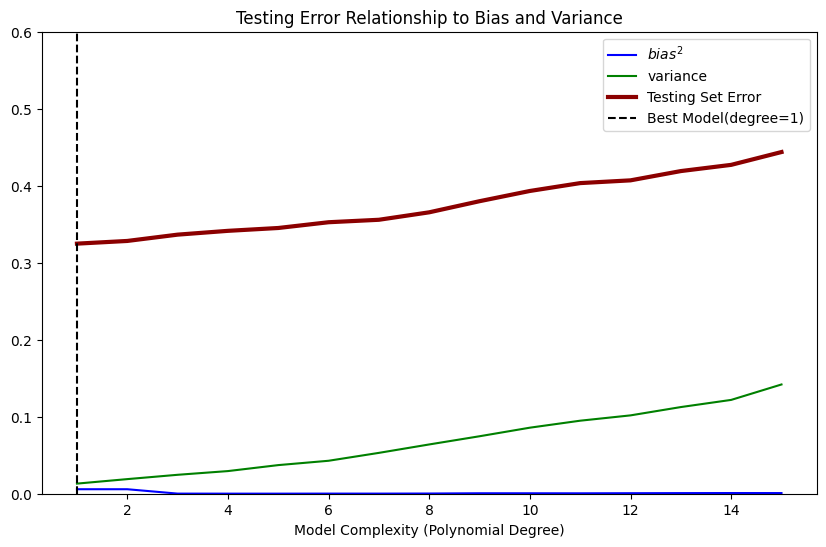

In [180]:
np.random.seed(123)
n_observations_per_dataset = 50
n_datasets = 100
max_poly_degree = 15  # Maximum model complexity
model_poly_degrees = range(1, max_poly_degree + 1)

NOISE_STD = np.sqrt(0.3)

percent_train = 0.8
n_train = 40

# Create training/testing inputs
x = np.linspace(-1, 1, n_observations_per_dataset)
x = np.random.permutation(x)
x_train = x[:n_train]
x_test = x[n_train:]

# logging variables
theta_hat = defaultdict(list)

pred_train = defaultdict(list)
pred_test = defaultdict(list)

train_errors = defaultdict(list)
test_errors = defaultdict(list)

# Loop over datasets
for dataset in range(n_datasets):
    # Simulate training/testing targets
    y_train = f(x_train) + NOISE_STD * np.random.randn(*x_train.shape)
    y_test = f(x_test) + NOISE_STD * np.random.randn(*x_test.shape)

    
    

    # Loop over model complexities
    for degree in model_poly_degrees:
        # Train model
        tmp_theta_hat = np.polyfit(x_train, y_train, degree)

        # Make predictions on train set
        tmp_pred_train = np.polyval(tmp_theta_hat, x_train)
        pred_train[degree].append(tmp_pred_train)

        # Test predictions
        tmp_pred_test = np.polyval(tmp_theta_hat, x_test)
        pred_test[degree].append(tmp_pred_test)

        # Mean Squared Error for train and test sets
        train_errors[degree].append(np.mean(error_function(tmp_pred_train, y_train)))
        test_errors[degree].append(np.mean(error_function(tmp_pred_test, y_test)))

print(x_test)
print(y_test)
def calculate_estimator_bias_squared(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]

    # (E[g(x)] - f(x))^2, averaged across all trials
    return np.mean((average_model_prediction - f(x_test)) ** 2)


def calculate_estimator_variance(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]

    # (g(x) - E[g(x)])^2, averaged across all trials
    return np.mean((pred_test - average_model_prediction) ** 2)


complexity_train_error = []
complexity_test_error = []
bias_squared = []
variance = []
for degree in model_poly_degrees:
    complexity_train_error.append(np.mean(train_errors[degree]))
    complexity_test_error.append(np.mean(test_errors[degree]))
    bias_squared.append(calculate_estimator_bias_squared(pred_test[degree]))
    variance.append(calculate_estimator_variance(pred_test[degree]))

best_model_degree = model_poly_degrees[np.argmin(complexity_test_error)]


# Visualizations
# fig, axs = plt.subplots(1, 2, figsize=(14, 10))

## Plot Bias^2 + variance
plt.figure(figsize=(10, 6))
# plt.sca(axs[0])
plt.plot(model_poly_degrees, bias_squared, color="blue", label="$bias^2$")
plt.plot(model_poly_degrees, variance, color="green", label="variance")

plt.plot(
    model_poly_degrees,
    complexity_test_error,
    label="Testing Set Error",
    linewidth=3,
    color=ERROR_COLOR,
)
plt.axvline(
    best_model_degree,
    linestyle="--",
    color="black",
    label=f"Best Model(degree={best_model_degree})",
)

plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylim([0, 0.6])
plt.legend()
plt.title("Testing Error Relationship to Bias and Variance")



### Problem 1.5

In [179]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

np.random.seed(123)

degree = 10
n_datasets = 100
n_train = 40
n_test = 10

# Lists to store bias, variance, and error for each model



x = np.linspace(-1, 1, 50)
x = np.random.permutation(x)
x_train = x[:n_train]
x_test = x[n_train:]
y_test = f(x_test) + np.random.normal(mu, sigma, x_test.shape)

# Fit polynomial regression models 
def fit_polynomial_model(x, y, degree, regularized=False):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(x.reshape(-1, 1))
    if not regularized:
        model = LinearRegression()
    else:
        model = Ridge(alpha=1.0)
    model.fit(X_poly, y)
    return model, poly_features



predictions_test = []
predictions_test_g10_reg = []

mse_list = []
mse_list_g10_reg = []

for _ in range(n_datasets):
    
    y_train = f(x_train) + np.random.normal(mu, sigma, x_train.shape)
    y_test = f(x_test) + np.random.normal(mu, sigma, x_test.shape)


    g10_model, g10_features = fit_polynomial_model(x_train, y_train, degree)
    g10_pred = g10_model.predict(g10_features.transform(x_test.reshape(-1, 1)))
    predictions_test.append(g10_pred)

    mse_list.append(mean_squared_error(y_test, g10_pred))

    # Fit the regularized polynomial model (g10 with L2 regularization)
    g10_reg_model, g10_reg_features = fit_polynomial_model(x_train, y_train, degree, regularized=True)
    g10_reg_pred = g10_reg_model.predict(g10_reg_features.transform(x_test.reshape(-1, 1)))
    predictions_test_g10_reg.append(g10_reg_pred)
    mse_list_g10_reg.append(mean_squared_error(y_test, g10_reg_pred))

# Convert list of test predictions to numpy array for easier calculation
predictions_test = np.array(predictions_test)
predictions_test_g10_reg = np.array(predictions_test_g10_reg)

# Calculate average prediction across all datasets and model types
def calculate_avg_metrics(predictions_test, mse_list, x_test):
    avg_prediction_test = predictions_test.mean(0)
    bias_squared = np.mean((f(x_test) - avg_prediction_test) ** 2)
    variance = np.mean(np.var(predictions_test, axis=0))
    avg_mse = np.mean(mse_list)
    return avg_prediction_test, bias_squared, variance, avg_mse

# Calculate average metrics for the standard polynomial model (g10)
avg_prediction_test, bias_squared_g10, variance_g10, avg_mse_g10 = calculate_avg_metrics(predictions_test, mse_list, x_test)

# Calculate average metrics for the regularized polynomial model (g10 with L2)
avg_prediction_test_g10_reg, bias_squared_g10_reg, variance_g10_reg, avg_mse_g10_reg = calculate_avg_metrics(predictions_test_g10_reg, mse_list_g10_reg, x_test)

print(f"Mean Squared Error for g10 model: {avg_mse_g10}")
print(f"Variance for g10 model: {variance_g10}")
print(f"Bias^2 for g10 model: {bias_squared_g10}\n")

print(f"Mean Squared Error for g10 model with L2 regularization: {avg_mse_g10_reg}")
print(f"Variance for g10 model with L2 regularization: {variance_g10_reg}")
print(f"Bias^2 for g10 model with L2 regularization: {bias_squared_g10_reg}")


Mean Squared Error for g10 model: 0.3937246850499749
Variance for g10 model: 0.0832924043190518
Bias^2 for g10 model: 0.0002626493545670861

Mean Squared Error for g10 model with L2 regularization: 0.37069878795090483
Variance for g10 model with L2 regularization: 0.018260035684285136
Bias^2 for g10 model with L2 regularization: 0.0214507537440533


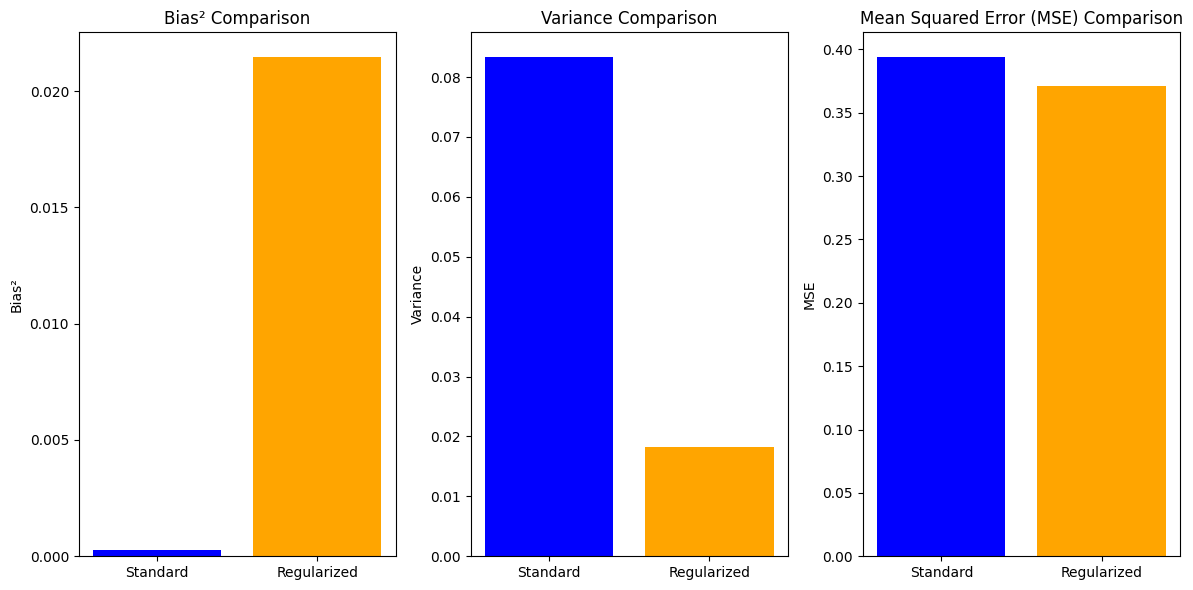

In [184]:
import matplotlib.pyplot as plt
np.random.seed(123)
# Create a figure to compare Bias^2, Variance, and MSE between standard and regularized models
plt.figure(figsize=(12, 6))

# Plot Bias^2 comparison
plt.subplot(1, 3, 1)
plt.bar(['Standard', 'Regularized'], [bias_squared_g10, bias_squared_g10_reg], color=['blue', 'orange'])
plt.title('Bias² Comparison')
plt.ylabel('Bias²')

# Plot Variance comparison
plt.subplot(1, 3, 2)
plt.bar(['Standard', 'Regularized'], [variance_g10, variance_g10_reg], color=['blue', 'orange'])
plt.title('Variance Comparison')
plt.ylabel('Variance')

# Plot MSE comparison
plt.subplot(1, 3, 3)
plt.bar(['Standard', 'Regularized'], [avg_mse_g10, avg_mse_g10_reg], color=['blue', 'orange'])
plt.title('Mean Squared Error (MSE) Comparison')
plt.ylabel('MSE')

# Show the plots
plt.tight_layout()
plt.show()
